
<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



## Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [1]:
import yfinance as yf
import pandas as pd

# Downloaded the Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reseted the index
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
import requests
from bs4 import BeautifulSoup

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tesla).text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Extracted revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        if revenue != "":
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Clean and display
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
tesla_revenue.tail()


,Date,Revenue


In [5]:
# Downloaded GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url_gme).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        if revenue != "":
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Clean
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue.tail()

,Date,Revenue


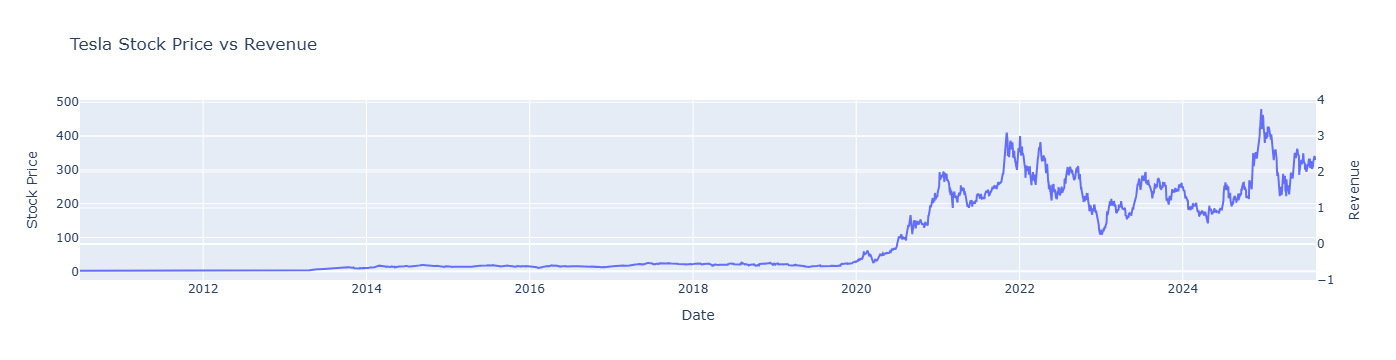

In [9]:
import plotly.graph_objects as go

# Tesla stock vs revenue
fig = go.Figure()

fig.add_trace(go.Scatter(x=tesla_data["Date"], y=tesla_data["Close"], name="Tesla Stock Price"))
fig.add_trace(go.Scatter(x=tesla_revenue["Date"], y=tesla_revenue["Revenue"], name="Tesla Revenue", yaxis="y2"))

# Add secondary y-axis
fig.update_layout(
    title="Tesla Stock Price vs Revenue",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Stock Price"),
    yaxis2=dict(title="Revenue", overlaying="y", side="right")
)

fig.show()

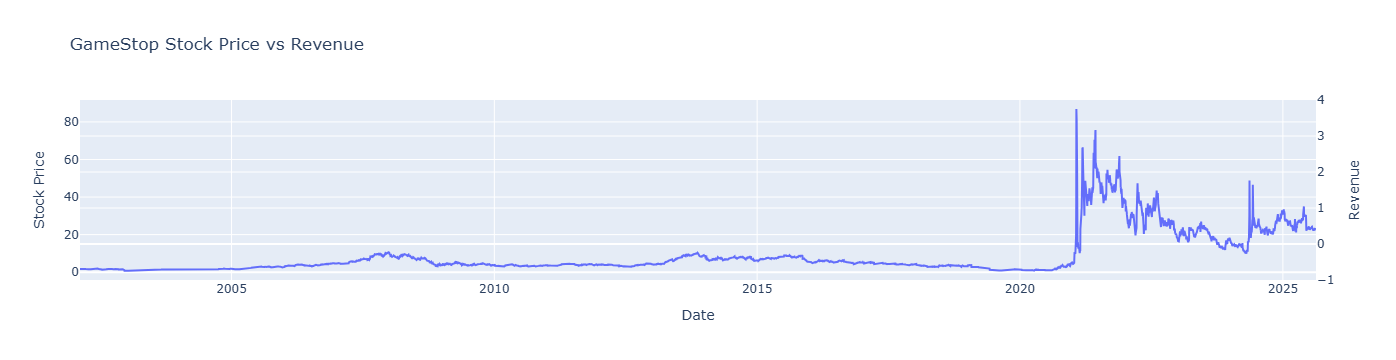

In [11]:
# GameStop stock vs revenue
fig = go.Figure()

fig.add_trace(go.Scatter(x=gme_data["Date"], y=gme_data["Close"], name="GameStop Stock Price"))
fig.add_trace(go.Scatter(x=gme_revenue["Date"], y=gme_revenue["Revenue"], name="GameStop Revenue", yaxis="y2"))

fig.update_layout(
    title="GameStop Stock Price vs Revenue",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Stock Price"),
    yaxis2=dict(title="Revenue", overlaying="y", side="right")
)

fig.show()
